# **Video Preprocessing**

- **Frame Extraction**: Extract frames from the video to get a sequence of 2D images. You can use tools like OpenCV for this.
- **Image Enhancement**: Apply filters or image enhancement techniques to highlight the organ and reduce noise. Techniques like histogram equalization or contrast adjustments can improve visibility.

# Importing

In [1]:
#!pip install pygame


In [2]:
from moviepy.editor import VideoFileClip
import matplotlib.pyplot as plt
from IPython.display import Video
import cv2
import numpy as np

In [3]:
# Load the video file
video = VideoFileClip("Zygote Body 3D Anatomy Online Visualizer _ Human Anatomy 3D - Google Chrome 2024-11-12 22-05-13.mp4")

# Set the desired crop width and height
crop_width = 400
crop_height = 600

# Calculate the top-left corner of the crop box to center the crop
x1 = (video.w - crop_width) / 2  # Center horizontally
y1 = (video.h - crop_height) / 2  # Center vertically

# Crop the video
cropped_video = video.crop(x1=x1, y1=y1, width=crop_width, height=crop_height)

# Get a frame from the cropped video at a specific time (e.g., 1 second)
frame = cropped_video.get_frame(1)  # Time in seconds

# Display the frame using matplotlib
plt.imshow(frame)
plt.axis('off')  # Hide axis
plt.show()


OSError: MoviePy error: the file Zygote Body 3D Anatomy Online Visualizer _ Human Anatomy 3D - Google Chrome 2024-11-12 22-05-13.mp4 could not be found!
Please check that you entered the correct path.

In [ ]:
# Crop out the first two seconds

video_duration = cropped_video.duration
trimmed_video = cropped_video.subclip(2, video_duration-1)  # Start from 2 seconds to the end

In [ ]:
# preview the video
trimmed_video.preview()

In [ ]:
# Save or view the cropped video
#cropped_video.write_videofile("center_cropped_video.mp4")

: 

# Select Three frames From the Video

In [4]:
newvid = VideoFileClip('heart_video.mp4')

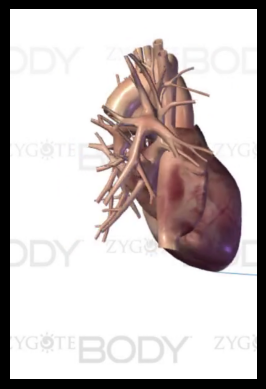

In [5]:
frame1 = newvid.get_frame(5)
plt.imshow(frame1)
plt.axis('off')  # Hide axis
plt.show()

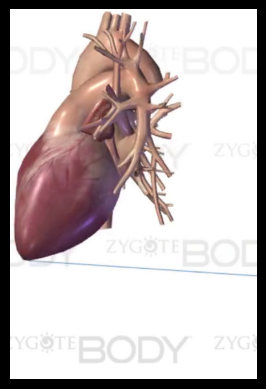

In [6]:
frame2 = newvid.get_frame(6)
plt.imshow(frame2)
plt.axis('off')  # Hide axis
plt.show()

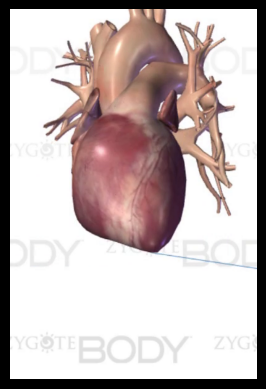

(600, 400, 3)


In [57]:
frame3 = newvid.get_frame(7)
plt.imshow(frame3)
plt.axis('off')  # Hide axis
plt.show()
print(frame3.shape)

In [8]:
frames = [frame1, frame2, frame3]

# Make Grayscale

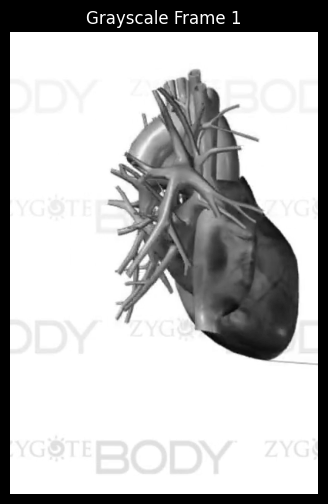

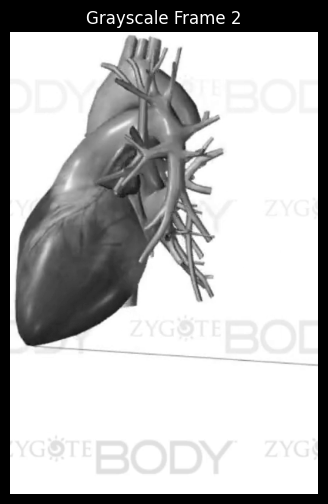

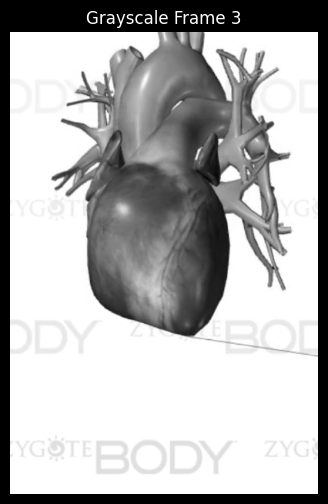

In [9]:


gray_frames = {}  # Dictionary to store the grayscale images

# Assuming 'frames' is a list of images
for idx, img in enumerate(frames):
    grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    
    # Store the grayscale image in the dictionary
    gray_frames[f"grayframe{idx + 1}"] = grayimg
    
    # Plot the grayscale image using matplotlib
    plt.figure(figsize=(6, 6))  # Set the size of the plot
    plt.imshow(grayimg, cmap='gray')  # Use 'gray' colormap for grayscale
    plt.title(f"Grayscale Frame {idx + 1}")  # Set the title of the plot
    plt.axis('off')  # Hide the axes
    plt.show()  # Display the plot


# Thresholding

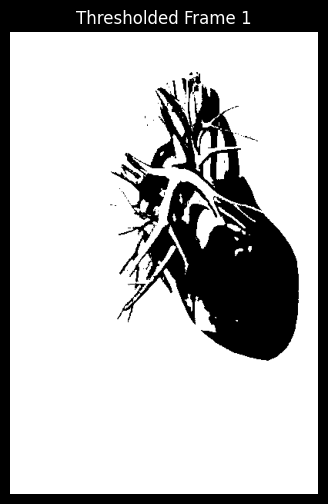

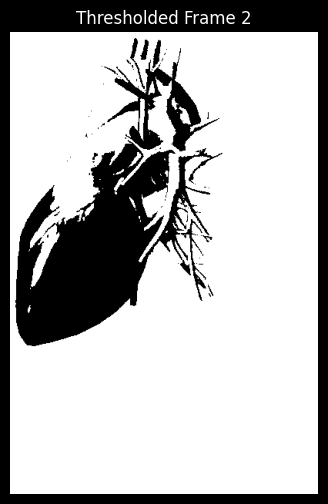

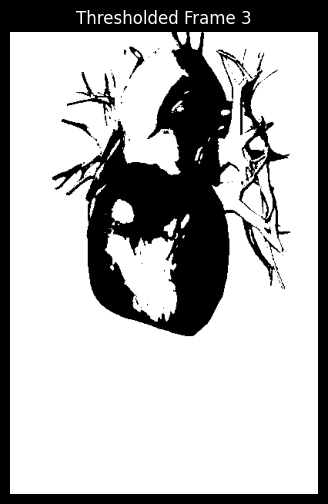

In [10]:

thresholded_frames = {}  # Dictionary to store thresholded images

# Assuming 'frames' is a list of images
for idx, img in enumerate(frames):
    grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
    
    # Apply thresholding to the grayscale image
    _, thresholded_img = cv2.threshold(grayimg, 127, 255, cv2.THRESH_BINARY)  # Threshold at 127
    
    # Store the thresholded image in the dictionary
    thresholded_frames[f"thresholded_frame{idx + 1}"] = thresholded_img
    
    # Plot the thresholded image using matplotlib
    plt.figure(figsize=(6, 6))  # Set the size of the plot
    plt.imshow(thresholded_img, cmap='gray')  # Use 'gray' colormap for grayscale
    plt.title(f"Thresholded Frame {idx + 1}")  # Set the title of the plot
    plt.axis('off')  # Hide the axes
    plt.show()  # Display the plot


# Adjust Thresholding

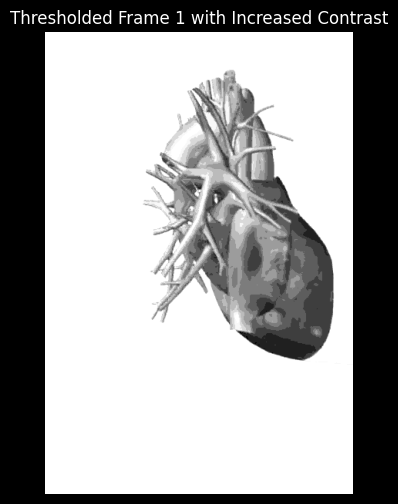

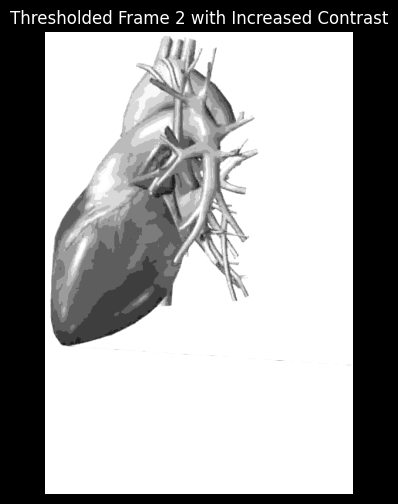

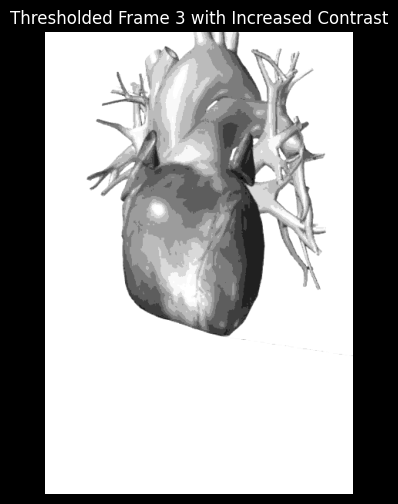

In [17]:
thresholded12_frames = {}  # Dictionary to store thresholded images

# Define the threshold values for 12 levels (adjust these values as needed)
threshold_values = [21, 43, 64, 85, 106, 128, 149, 170, 191, 213, 234]  # 12 levels: 0–21, 22–43, ..., 235–255

# Assuming 'frames' is a list of images
for idx, img in enumerate(frames):
    grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale

    # Apply multi-level thresholding (12 levels)
    thresholded_img = grayimg.copy()

    # Assign values for each threshold level
    for i in range(len(threshold_values)):
        lower_bound = 0 if i == 0 else threshold_values[i - 1]
        upper_bound = threshold_values[i]
        value = upper_bound
        thresholded_img[(grayimg > lower_bound) & (grayimg <= upper_bound)] = value

    # Set values above the last threshold to 255
    thresholded_img[(grayimg > threshold_values[-1])] = 255

    # Increase the contrast
    alpha = 1.3  # Contrast control (1.0 means no change, >1 increases contrast)
    beta = 0     # Brightness control (0 means no change)

    # Apply contrast stretching (increase contrast)
    contrast_img = cv2.convertScaleAbs(thresholded_img, alpha=alpha, beta=beta)

    # Store the contrast-adjusted image in the dictionary
    thresholded12_frames[f"thresholded_frame{idx + 1}"] = contrast_img

    # Plot the thresholded image with increased contrast using matplotlib
    plt.figure(figsize=(6, 6))  # Set the size of the plot
    plt.imshow(contrast_img, cmap='gray')  # Use 'gray' colormap for grayscale
    plt.title(f"Thresholded Frame {idx + 1} with Increased Contrast")  # Set the title of the plot
    plt.axis('off')  # Hide the axes
    plt.show()  # Display the plot


# Histogram Equalization

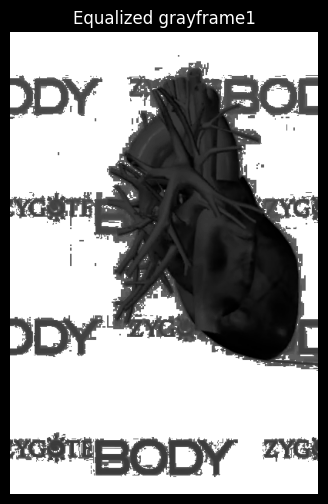

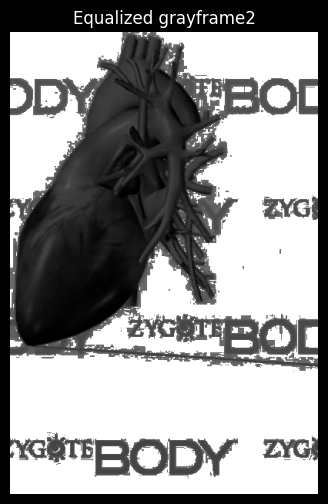

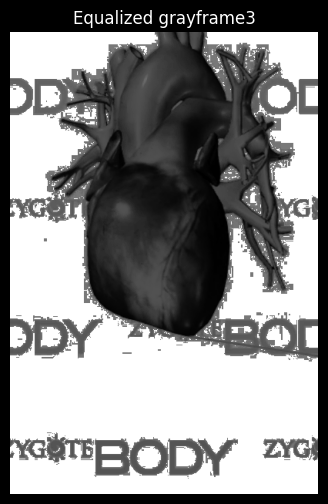

In [ ]:
# Assuming 'gray_frames' is a dictionary containing grayscale images
equalized_frames = {}  # Dictionary to store equalized images

# Iterate through each grayscale image in the dictionary
for idx, grayimg in gray_frames.items():
    # Apply histogram equalization to the grayscale image
    equalized_img = cv2.equalizeHist(grayimg)
    
    # Store the equalized image in the dictionary
    equalized_frames[idx] = equalized_img
    
    # Plot the equalized image using matplotlib
    plt.figure(figsize=(6, 6))  # Set the size of the plot
    plt.imshow(equalized_img, cmap='gray')  # Use 'gray' colormap for grayscale
    plt.title(f"Equalized {idx}")  # Set the title of the plot
    plt.axis('off')  # Hide the axes
    plt.show()  # Display the plot


# Outline the Heart with Edge Detector

Here we are using Canny Edge Detector.

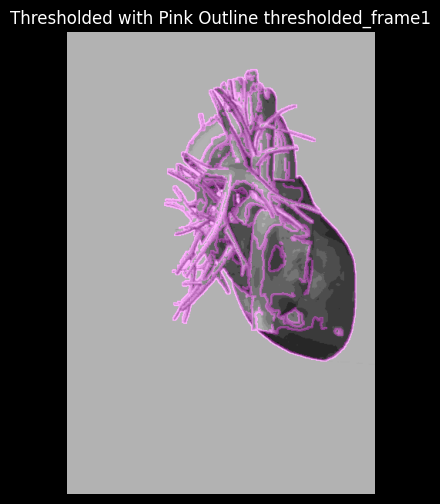

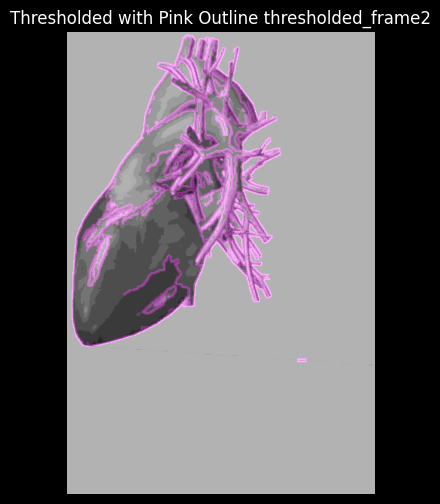

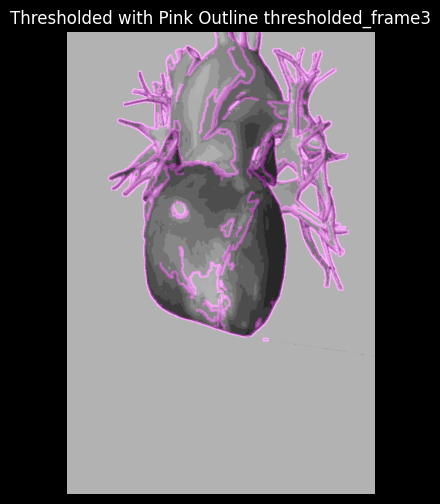

In [18]:
thresholded_frames_with_outline = {}  # Dictionary to store thresholded images with pink outlines
dilated_edge_dict = {} # dictionary to store dilated edges

# Assuming 'thresholded8_frames' is a dictionary where the keys are frame names and the values are image matrices
for name, img in thresholded12_frames.items():
    # Check if the image is in grayscale (single-channel)
    if len(img.shape) == 3:  # Check if it's a multi-channel image (e.g., RGB)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale if it's not already

    # Apply Canny edge detection
    edges = cv2.Canny(img, threshold1=100, threshold2=200)  # Adjust thresholds as needed

    # Dilate the edges
    kernel = np.ones((3, 3), np.uint8)  # Define the dilation kernel
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)

    # save dilated edges
    dilated_edge_dict[name] = dilated_edges
    
    # Create a 3-channel image for the edges and set all edge pixels to pink (BGR format: [255, 0, 255])
    edges_colored = cv2.cvtColor(dilated_edges, cv2.COLOR_GRAY2BGR)
    edges_colored[dilated_edges == 255] = [255, 0, 255]  # Set edges (255) to bright pink
    
    # Combine the original grayscale image with the pink edges outline
    outlined_img = cv2.addWeighted(cv2.cvtColor(img, cv2.COLOR_GRAY2BGR), 0.7, edges_colored, 0.3, 0)
    
    # Store the outlined image in the dictionary
    thresholded_frames_with_outline[name] = outlined_img
    
    # Plot the outlined image using matplotlib
    plt.figure(figsize=(6, 6))  # Set the size of the plot
    plt.imshow(cv2.cvtColor(outlined_img, cv2.COLOR_BGR2RGB))  # Convert to RGB for correct display
    plt.title(f"Thresholded with Pink Outline {name}")  # Set the title of the plot
    plt.axis('off')  # Hide the axes
    plt.show()  # Display the plot




# Find the contours of the edges

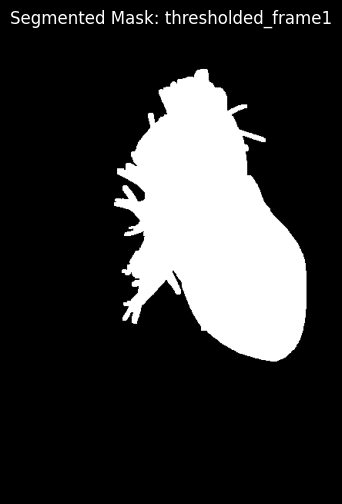

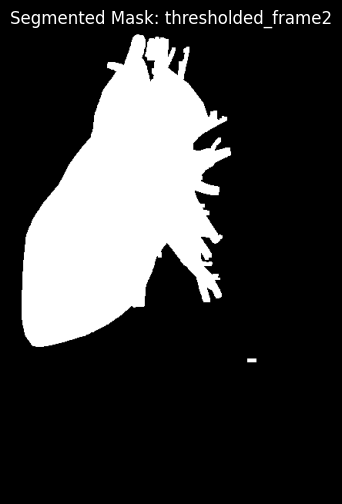

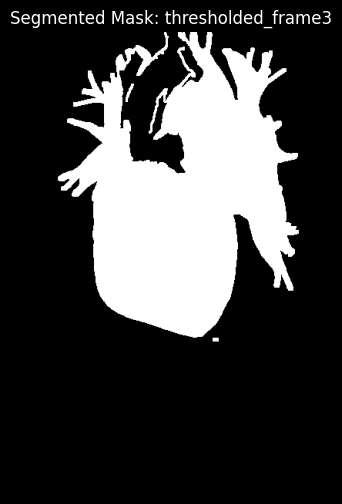

In [19]:
contour_dict = {}  # Dictionary to store contours and masks

# Assuming 'frame1' is the original frame, and 'dilated_edge_dict' contains edge-detected images
framesize = frame1.shape[:2]  # Get the height and width of the frame

for name, edges in dilated_edge_dict.items():
    # Find contours from the edge-detected image
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a blank mask for drawing the contours
    contour_mask = np.zeros(framesize, dtype=np.uint8)  # Ensure correct shape and type
    cv2.drawContours(contour_mask, contours, -1, 255, thickness=cv2.FILLED)

    # Store the mask in the dictionary
    contour_dict[name] = contour_mask

    # Display the segmented mask
    plt.figure(figsize=(6, 6))
    plt.imshow(contour_mask, cmap="gray")
    plt.title(f"Segmented Mask: {name}")
    plt.axis("off")
    plt.show()



# Segment the Region of Interest

Using the mask generated from the contours we can segment a region of interest

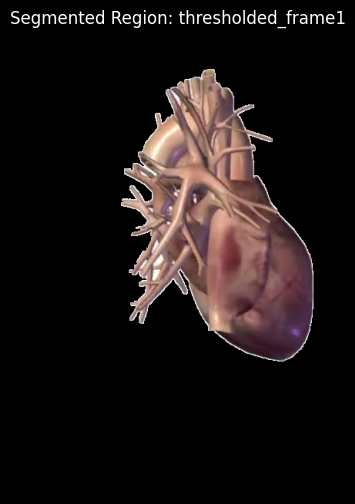

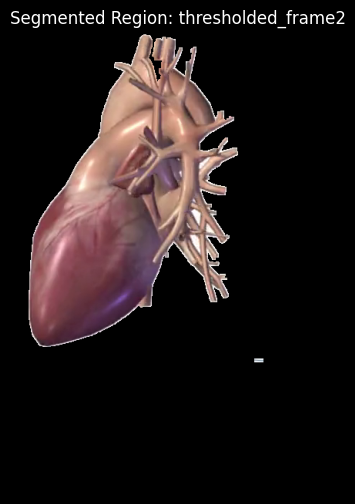

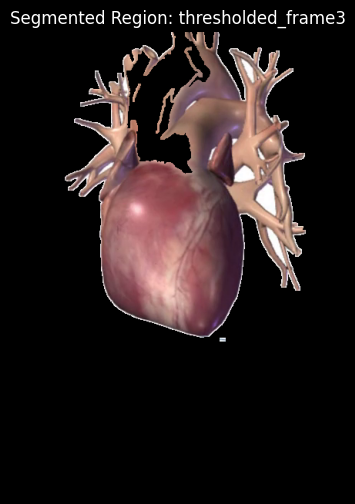

In [20]:
for name, frame in zip(contour_dict.keys(), frames):
    # Apply the mask from contour_dict to the current frame
    segmented_img = cv2.bitwise_and(frame, frame, mask=contour_dict[name])

    # Plot the segmented region
    plt.figure(figsize=(6, 6))
    plt.imshow(segmented_img, cmap="gray")
    plt.title(f"Segmented Region: {name}")
    plt.axis("off")
    plt.show()


# Fill Holes in image using Morphological Operations

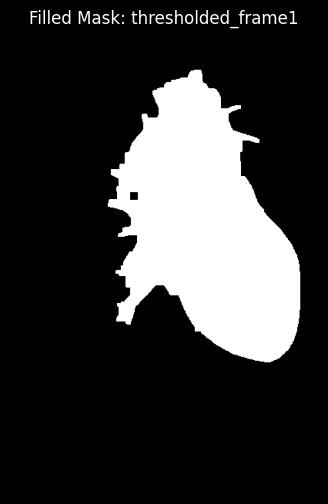

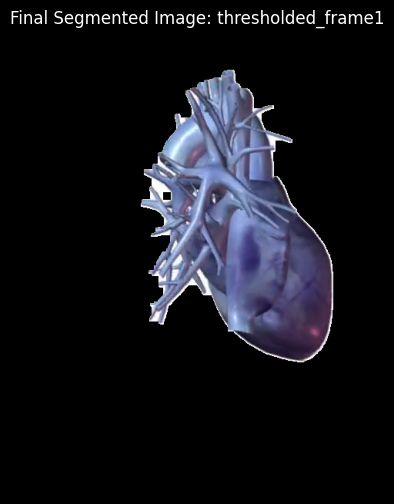

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))  # Define a structuring element (adjust size as needed)

# Select the third frame and its corresponding contour mask
third_frame = frames[0]  # Index 2 corresponds to the third frame
third_contour_mask_name = list(contour_dict.keys())[0]  # Get the key for the third contour mask
third_contour_mask = contour_dict[third_contour_mask_name]

# Fill gaps in the mask using morphological closing
filled_mask = cv2.morphologyEx(third_contour_mask, cv2.MORPH_CLOSE, kernel)

# Display the filled mask
plt.figure(figsize=(6, 6))
plt.imshow(filled_mask, cmap="gray")
plt.title(f"Filled Mask: {third_contour_mask_name}")
plt.axis("off")
plt.show()

# Apply the filled mask to the original frame
final_segmented_image = cv2.bitwise_and(third_frame, third_frame, mask=filled_mask)

# Display the final segmented image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(final_segmented_image, cv2.COLOR_BGR2RGB))  # Convert to RGB for display
plt.title(f"Final Segmented Image: {third_contour_mask_name}")
plt.axis("off")
plt.show()

# save image



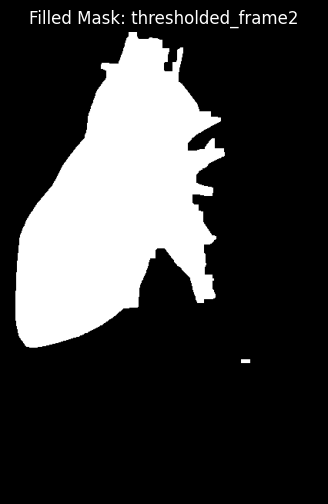

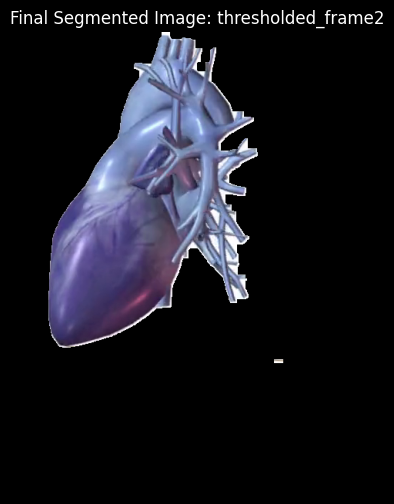

In [40]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))  # Define a structuring element (adjust size as needed)

# Select the third frame and its corresponding contour mask
third_frame = frames[1]  # Index 2 corresponds to the third frame
third_contour_mask_name = list(contour_dict.keys())[1]  # Get the key for the third contour mask
third_contour_mask = contour_dict[third_contour_mask_name]

# Fill gaps in the mask using morphological closing
filled_mask = cv2.morphologyEx(third_contour_mask, cv2.MORPH_CLOSE, kernel)

# Display the filled mask
plt.figure(figsize=(6, 6))
plt.imshow(filled_mask, cmap="gray")
plt.title(f"Filled Mask: {third_contour_mask_name}")
plt.axis("off")
plt.show()

# Apply the filled mask to the original frame
final_segmented_image = cv2.bitwise_and(third_frame, third_frame, mask=filled_mask)

# Display the final segmented image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(final_segmented_image, cv2.COLOR_BGR2RGB))  # Convert to RGB for display
plt.title(f"Final Segmented Image: {third_contour_mask_name}")
plt.axis("off")
plt.show()


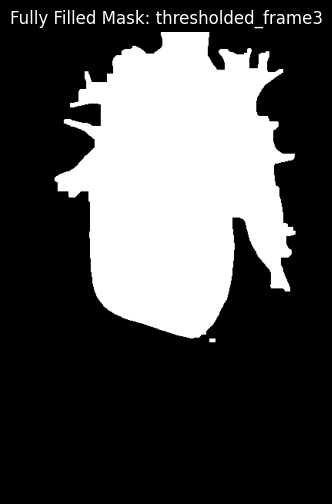

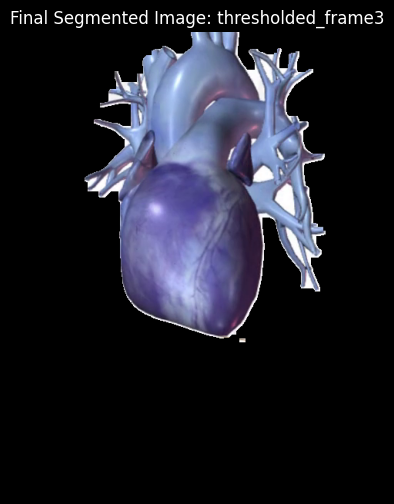

In [45]:
# Define a larger structuring element for the closing operation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 10))  # Adjust size based on your image and holes

# Select the third frame and its corresponding contour mask
third_frame = frames[2]  # Index 2 corresponds to the third frame
third_contour_mask_name = list(contour_dict.keys())[2]  # Get the key for the third contour mask
third_contour_mask = contour_dict[third_contour_mask_name]

# Perform morphological closing to fill small gaps and holes
closed_mask = cv2.morphologyEx(third_contour_mask, cv2.MORPH_CLOSE, kernel)

# Flood filling to fill the remaining holes
filled_mask = closed_mask.copy()
h, w = filled_mask.shape[:2]
flood_fill_mask = np.zeros((h + 2, w + 2), np.uint8)  # Create a mask for the flood fill function
cv2.floodFill(filled_mask, flood_fill_mask, (0, 0), 255)  # Flood fill from the top-left corner

# Invert the flood-filled image
inverted_filled_mask = cv2.bitwise_not(filled_mask)

# Combine the closed mask and the inverted flood-filled mask
final_filled_mask = closed_mask | inverted_filled_mask

# Display the filled mask
plt.figure(figsize=(6, 6))
plt.imshow(final_filled_mask, cmap="gray")
plt.title(f"Fully Filled Mask: {third_contour_mask_name}")
plt.axis("off")
plt.show()

# Apply the filled mask to the original frame
final_segmented_image = cv2.bitwise_and(third_frame, third_frame, mask=final_filled_mask)

# Display the final segmented image
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(final_segmented_image, cv2.COLOR_BGR2RGB))  # Convert to RGB for display
plt.title(f"Final Segmented Image: {third_contour_mask_name}")
plt.axis("off")
plt.show()



# Camera Calibration

## Intrinsic Parameters

Calibration was successful: 4234998567.4545436
Camera matrix (K):
 [[1.42629489e+18 0.00000000e+00 2.99500000e+02]
 [0.00000000e+00 1.77952155e+18 1.99500000e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion coefficients (dist):
 [[-3.69271935e-18  5.12392327e-34  3.54224998e-09  1.93444018e-09
   8.22585168e-50]]


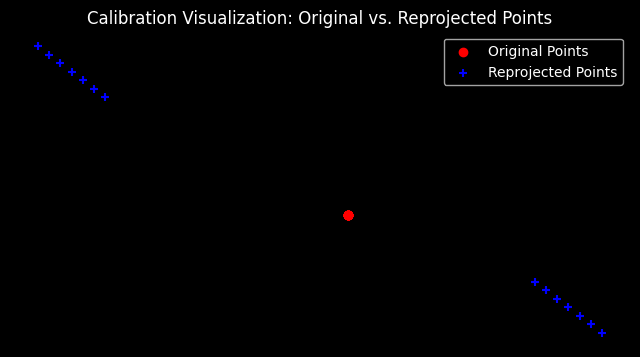

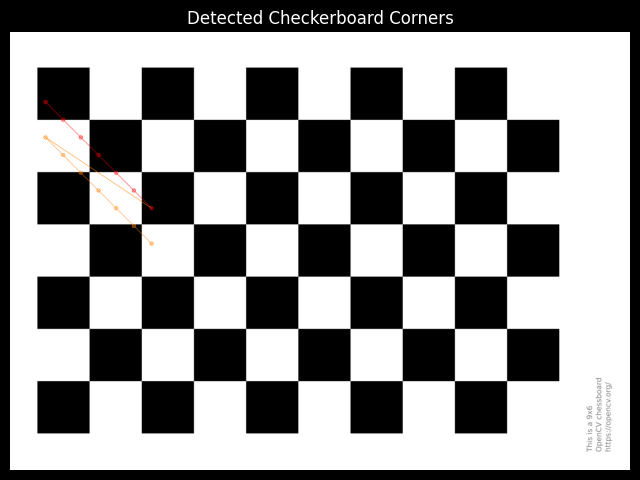

Mean Reprojection Error: 1131850984.9938366


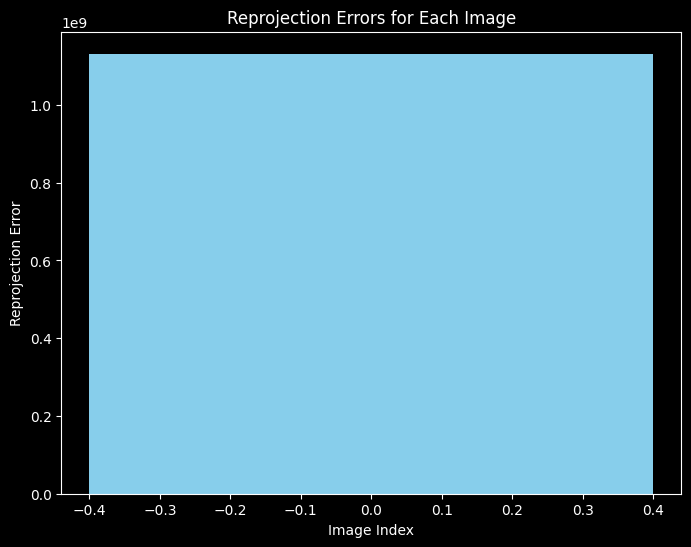

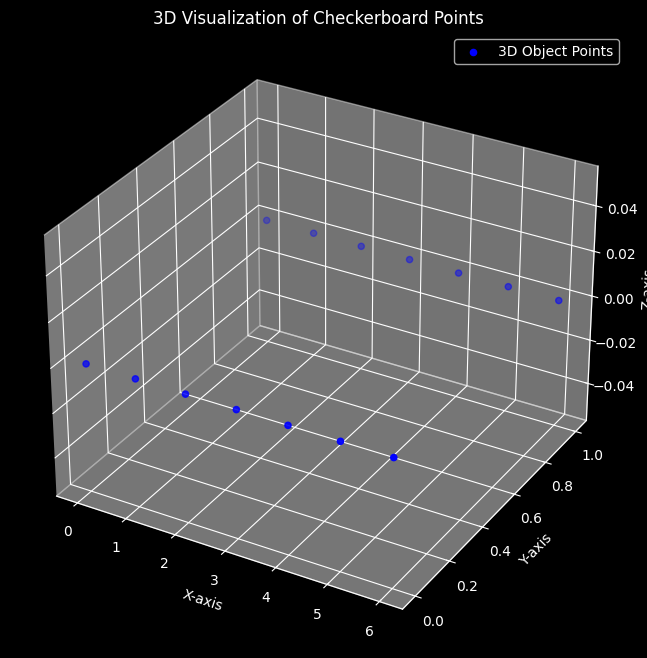

In [66]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Path to the calibration image
calibration_image_path = 'C:\\Users\\esthe\\Computer Vision Project\\3D-Organ-Reconstruction-from-Video-1\\pattern.png'

# Simulate object points (3D points in real-world space)
checkerboard_size = (7, 2)
objp = np.zeros((checkerboard_size[0] * checkerboard_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:checkerboard_size[0], 0:checkerboard_size[1]].T.reshape(-1, 2)

# Create synthetic image points (2D points in image plane)
imgpoints = [np.array([[100, 200], [150, 250], [200, 300], [250, 350], [300, 400], [350, 450], [400, 500],
                       [100, 300], [150, 350], [200, 400], [250, 450], [300, 500], [350, 550], [400, 600]],
                      dtype=np.float32).reshape(-1, 1, 2)]
objpoints = [objp]  # Repeat for as many images as you have

# Ensure image size is valid
image_size = (600, 400)  # Replace with your actual image resolution (width, height)

# Perform camera calibration
ret, K, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image_size, None, None)

# Print calibration results
print("Calibration was successful:", ret)
print("Camera matrix (K):\n", K)
print("Distortion coefficients (dist):\n", dist)

# Load the calibration image
img = cv2.imread(calibration_image_path)

# Check if the image was successfully loaded
if img is None:
    raise FileNotFoundError(f"Image not found at {calibration_image_path}")

# Convert imgpoints to a NumPy array for indexing
img_points = np.array(imgpoints[0])  # 2D points for this image
obj_points = objpoints[0]  # 3D points for this image

# Project 3D points back onto the image plane
reprojected_points, _ = cv2.projectPoints(obj_points, rvecs[0], tvecs[0], K, dist)

# Visualize the original and reprojected points
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))  # Convert image to RGB for display
plt.scatter(img_points[:, 0, 0], img_points[:, 0, 1], color='red', label='Original Points')  # Original points
plt.scatter(reprojected_points[:, 0, 0], reprojected_points[:, 0, 1], color='blue', label='Reprojected Points', marker='+')  # Reprojected points
plt.legend()
plt.title("Calibration Visualization: Original vs. Reprojected Points")
plt.axis("off")
plt.show()

# Visualize detected checkerboard corners
img_with_corners = cv2.drawChessboardCorners(img, checkerboard_size, img_points, True)

plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(img_with_corners, cv2.COLOR_BGR2RGB))
plt.title("Detected Checkerboard Corners")
plt.axis("off")
plt.show()

# Compute the reprojection error
total_error = 0
for i in range(len(objpoints)):
    reprojected_points, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], K, dist)
    error = cv2.norm(imgpoints[i], reprojected_points, cv2.NORM_L2) / len(reprojected_points)
    total_error += error

mean_error = total_error / len(objpoints)
print(f"Mean Reprojection Error: {mean_error}")

# Visualize reprojection errors for each image
errors = []
for i in range(len(objpoints)):
    reprojected_points, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], K, dist)
    error = cv2.norm(imgpoints[i], reprojected_points, cv2.NORM_L2) / len(reprojected_points)
    errors.append(error)

plt.figure(figsize=(8, 6))
plt.bar(range(len(errors)), errors, color='skyblue')
plt.xlabel("Image Index")
plt.ylabel("Reprojection Error")
plt.title("Reprojection Errors for Each Image")
plt.show()

# Plot the 3D object points
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(obj_points[:, 0], obj_points[:, 1], obj_points[:, 2], c='b', marker='o', label='3D Object Points')

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("3D Visualization of Checkerboard Points")
plt.legend()
plt.show()



In [62]:
ret, K, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, image_size, None, None)

print("Calibration was successful:", ret)
print("Camera matrix (K):\n", K)
print("Distortion coefficients (dist):\n", dist)

Calibration was successful: 4234998567.4545436
Camera matrix (K):
 [[1.42629489e+18 0.00000000e+00 2.99500000e+02]
 [0.00000000e+00 1.77952155e+18 1.99500000e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
Distortion coefficients (dist):
 [[-3.69271935e-18  5.12392327e-34  3.54224998e-09  1.93444018e-09
   8.22585168e-50]]


## Extrinsic Parameters

In [ ]:
E, mask = cv2.findEssentialMat(points1, points2, K, method=cv2.RANSAC, prob=0.999, threshold=1.0)
_, R, T, mask_pose = cv2.recoverPose(E, points1, points2, K)